# Step 1: Importing the relevent libraries

In [1]:
import numpy as np
# Visulaization Library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# EDA
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Step 2: Data Inspection

In [2]:
# Loading train and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Checking the rows and columns
train.shape,test.shape

((2952, 70), (1969, 69))

**we have 2952 rows and 70 columns in training data set whereas 1969 rows and 69 columns in test data**

In [4]:
train.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
0,TCBA-B8-0x204,7,Male,60-64,NaN,2010,81403,2016.0,34,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,TCBA-B8-0x1063,1,Male,85-89,White,2012,80463,2016.0,4,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,TCBA-B8-0xb7d,1,Female,70-74,White,2013,80103,2018.0,20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,TCBA-B8-0xfa7,104,Female,65-69,White,2013,80463,2018.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,TCBA-B8-0xdc,21,Male,50-54,White,2010,80463,2016.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
test.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66
0,TCBA-B8-0x7e9,1,Male,85-89,White,2009,80003,2014.0,25,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TCBA-B8-0x6bc,1,Male,80-84,White,2013,82503,2020.0,12,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TCBA-B8-0x1195,1,Male,60-64,White,2013,80703,2017.0,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCBA-B8-0x8a5,1,Male,85-89,White,2013,80103,2018.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCBA-B8-0xa21,1,Male,85-89,White,2009,80003,NaN,25,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#ratio of null values in train data
train.isnull().sum()/train.shape[0] *100

patient_id              0.000000
tumor_cell_count        0.000000
gender                  0.000000
age_group               0.846883
race                   10.264228
                         ...    
symptom63               0.000000
symptom64               0.000000
symptom65               0.000000
symptom66               0.000000
death_due_to_cancer     0.000000
Length: 70, dtype: float64

In [7]:
#ratio of null values in test data
test.isnull().sum()/test.shape[0] *100

patient_id           0.000000
tumor_cell_count     0.000000
gender               0.000000
age_group            0.761808
race                10.106653
                      ...    
symptom62            0.050787
symptom63            0.050787
symptom64            0.050787
symptom65            0.050787
symptom66            0.050787
Length: 69, dtype: float64

**we have so many null values**

In [8]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 5
Numerical Features in Train Set: 65


In [9]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 5
Numerical Features in Test Set: 64


In [10]:
# The classes are heavily skewed we need to solve this issue later.
print('death due to cancer', round(train['death_due_to_cancer'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('death not due to cancer', round(train['death_due_to_cancer'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

death due to cancer 30.05 % of the dataset
death not due to cancer 69.95 % of the dataset


**the data is balanced healthy but some data are missing**

# Step 3: Data Cleaning & EDA

In [11]:
train.isnull().sum()

patient_id               0
tumor_cell_count         0
gender                   0
age_group               25
race                   303
                      ... 
symptom63                0
symptom64                0
symptom65                0
symptom66                0
death_due_to_cancer      0
Length: 70, dtype: int64

In [12]:
train['age_group'].unique()

array(['60-64', '85-89', '70-74', '65-69', '50-54', '75-79', '80-84',
       '55-59', '90+', '40-44', '45-49', nan, '00-39'], dtype=object)

In [13]:
train['race'].unique()

array([nan, 'White', 'Asian', 'Black', 'Mixed', 'OtherEth', 'Chinese'],
      dtype=object)

In [14]:
#removing these three codes because these are not required the cause of death is cancer 
train = train.drop(['patient_id','age_group','race','year_of_death','area_code'], axis = 1)

In [15]:
train.isnull().sum()

tumor_cell_count       0
gender                 0
year_of_diagnosis      0
morphology_code        0
smoke_units            0
                      ..
symptom63              0
symptom64              0
symptom65              0
symptom66              0
death_due_to_cancer    0
Length: 65, dtype: int64

In [16]:
test = test.drop(['patient_id','age_group','race','year_of_death','area_code'], axis = 1)

In [17]:
test.isnull().sum()

tumor_cell_count     0
gender               0
year_of_diagnosis    0
morphology_code      0
smoke_units          0
                    ..
symptom62            1
symptom63            1
symptom64            1
symptom65            1
symptom66            1
Length: 64, dtype: int64

In [18]:
#filling the missing values
cateogry_columns=test.select_dtypes(include=['object']).columns.tolist()
integer_columns=test.select_dtypes(include=['int64','float64']).columns.tolist()
for column in test:
    if test[column].isnull().any():
        if(column in cateogry_columns):
            test[column]=test[column].fillna(test[column].mode()[0])
        else:
            test[column]=test[column].fillna(test[column].mode()[0])

In [19]:
test.isnull().sum()

tumor_cell_count     0
gender               0
year_of_diagnosis    0
morphology_code      0
smoke_units          0
                    ..
symptom62            0
symptom63            0
symptom64            0
symptom65            0
symptom66            0
Length: 64, dtype: int64

**thier is no null value presents in the train and test data**

In [20]:
# Labelencoding
encoder = LabelEncoder()

for i in train.columns: 
    if train[i].dtype == 'object': 
        encoder.fit_transform(list(train[i].values))
        train[i] = encoder.transform(train[i].values)
         
        for j in train.columns:
            if train[j].dtype == 'int':
                train[j] = train[j].astype('float64')

for k in test.columns:
    if test[k].dtype == 'object': 
        encoder.fit_transform(list(test[k].values))
        test[k] = encoder.transform(test[k].values)
         
        for m in test.columns:
            if test[m].dtype == 'int':
                test[m] = test[m].astype('float64')

In [21]:
train.head()

,tumor_cell_count,gender,year_of_diagnosis,morphology_code,smoke_units,alcohol_consume_units,symptoms,symptom1,symptom2,symptom3,...,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
0,7,1.0,2010,81403,34,2,116.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,1.0,2012,80463,4,5,60.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1,0.0,2013,80103,20,4,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,104,0.0,2013,80463,20,3,148.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,21,1.0,2010,80463,20,2,260.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [22]:
# Seperate Features and Target
X = train.drop('death_due_to_cancer',axis=1)
y = train['death_due_to_cancer']

In [23]:
#Using normalization to X and test_predict

scalar = MinMaxScaler()
X_scalar = pd.DataFrame(scalar.fit_transform(X),columns = X.columns)

# Normalization scalar for test prediction data
test_scalar = pd.DataFrame(scalar.fit_transform(test),columns = test.columns)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_scalar,y,test_size=0.2,random_state=22)

# importing machine learning modules

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

In [26]:
algos = [LogisticRegression(),KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(),GaussianNB()]
names = ['Logistic Regression','k-Nearest Neighbors','Decision Trees','Random Forest Regressor','Naive Bayes']
f1_score_list = []

In [27]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    MSE= metrics.mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    f1_score_list.append(rmse)

In [28]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': f1_score_list})

In [29]:
evaluation

,Model,RMSE
0,Logistic Regression,0.572937
1,k-Nearest Neighbors,0.514428
2,Decision Trees,0.627891
3,Random Forest Regressor,0.470422
4,Naive Bayes,0.674656


**Picking the better module for the prediction**

In [30]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

pred_train = model1.predict(X_train) 
pred_test = model1.predict(X_test)

**I picked decision tree because its not showing any under and over fitting so**

# Evaluation

In [31]:
import math
# Evaluating Train Data
train_f1_score = 100 * metrics.f1_score(y_train, pred_train)
print(f'Train f1_score: {train_f1_score}')

Train f1_score: 100.0


In [32]:
# Evaluating Test Data
test_f1_score = 100 * metrics.f1_score(y_test, pred_test)
print(f'Test f1_score: {test_f1_score}')

test_mse = metrics.mean_squared_error(y_test, pred_test)
print(f'Test MSE : {test_mse}')

test_RMSE = math.sqrt(metrics.mean_squared_error(y_test, pred_test))
print(f'Test RMSE : {test_RMSE}')

Test f1_score: 70.79207920792078
Test MSE : 0.3993231810490694
Test RMSE : 0.6319202331379091


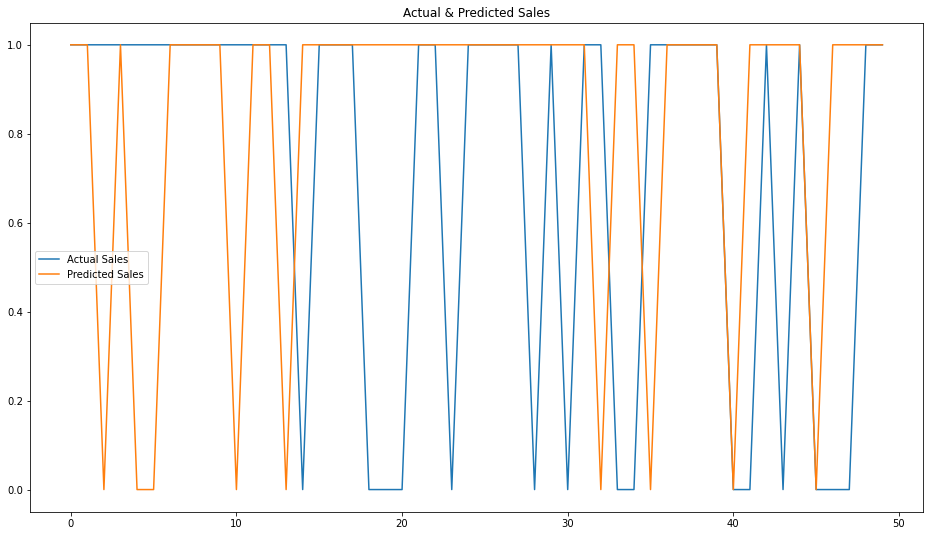

In [33]:
# Visualization for Actual and Predicted Sales in testing Data
test = pd.DataFrame(
    {'Predicted death':pred_test, 'Actual death':y_test}
)

fig= plt.figure(
    figsize=(16, 9)
)

test = test.reset_index()
test = test.drop(
    ['index'],axis=1
)

plt.plot(test[:50])
plt.legend(['Actual Sales','Predicted Sales'])
plt.title('Actual & Predicted Sales')
plt.show()

# Testing the given data

In [35]:
final_test = model1.predict(test_scalar)

In [39]:
sub = pd.read_csv("test.csv")

In [46]:
sub1 = sub.patient_id

In [59]:
final_test = final_test.astype('int64')

In [64]:
submission = pd.DataFrame(
    {'patient_id':sub1, 'death_due_to_cancer':final_test})

In [65]:
submission

,patient_id,death_due_to_cancer
0,TCBA-B8-0x7e9,1
1,TCBA-B8-0x6bc,1
2,TCBA-B8-0x1195,1
3,TCBA-B8-0x8a5,1
4,TCBA-B8-0xa21,1
...,...,...
1964,TCBA-B8-0xc5f,1
1965,TCBA-B8-0x267,1
1966,TCBA-B8-0xce9,1
1967,TCBA-B8-0xc20,1


In [66]:
submission.to_csv('Submission.csv', index = False)